## California Housing Prices

In [1]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
file = os.listdir(path)[0]

Using Colab cache for faster access to the 'california-housing-prices' dataset.


### About Dataset

https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

### Features

| Feature's Name | Information |
|---------| ------------|
| longitude | A measure of how far west a house is; a higher value is farther west |
| latitude | A measure of how far north a house is; a higher value is farther north |
| housingMedianAge | Median age of a house within a block; a lower number is a newer building |
| totalRooms | Total number of rooms within a block |
| totalBedrooms | Total number of bedrooms within a block |
| population | Total number of people residing within a block |
| households | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| medianHouseValue | Median house value for households within a block (measured in US Dollars) |
| oceanProximity | Location of the house w.r.t ocean/sea |

### Objectives

1. Creating a model for predicting the house pricing given some informations.

_Important, the data must be cleaned._

### Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

In [3]:
# Reading file
df = pd.read_csv("/".join([path,file]))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Checking the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Checking the missing values in the dataset
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# Filling the missing value
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


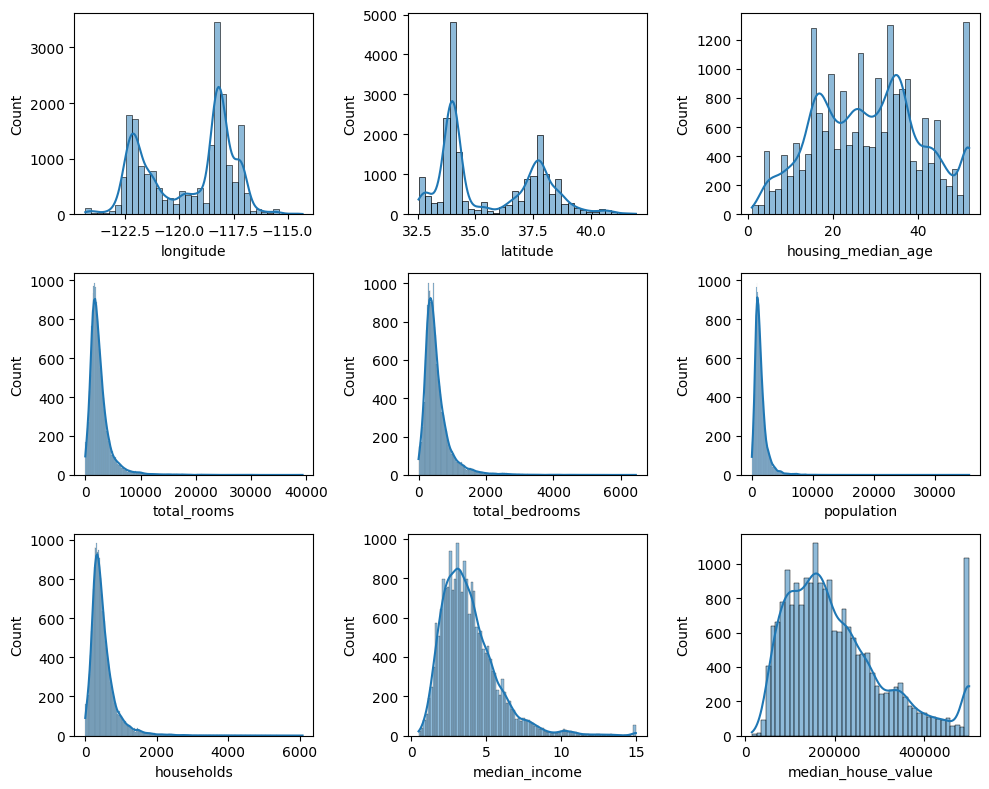

In [8]:
# Checking the outliers for numerical features
df_OnlyFloat = df.select_dtypes('float64')
df_OnlyFloatCols = df_OnlyFloat.columns

fig, ax = plt.subplots(figsize=(10,8), ncols=3, nrows=3)
k = 0
for i in range(3):
  for j in range(3):
    getFeatureCol = df_OnlyFloatCols[k]
    sns.histplot(df_OnlyFloat[getFeatureCol], kde=True, ax=ax[i][j])
    plt.tight_layout()
    k += 1


Text(0.5, 0, 'Median Income (in $10.000)')

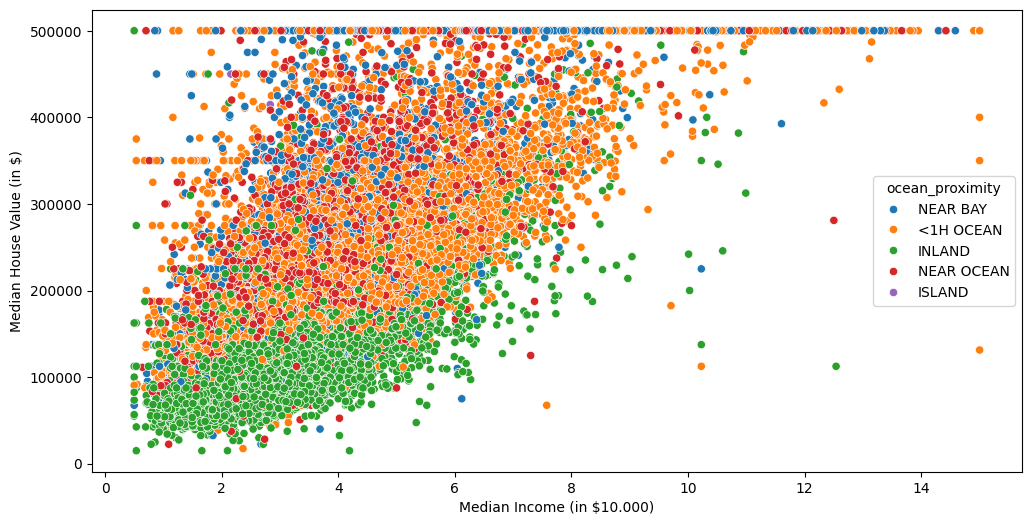

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity', ax=ax)
ax.set_ylabel('Median House Value (in $)')
ax.set_xlabel('Median Income (in $10.000)')

Text(0.5, 1.0, 'Block of Houses in California')

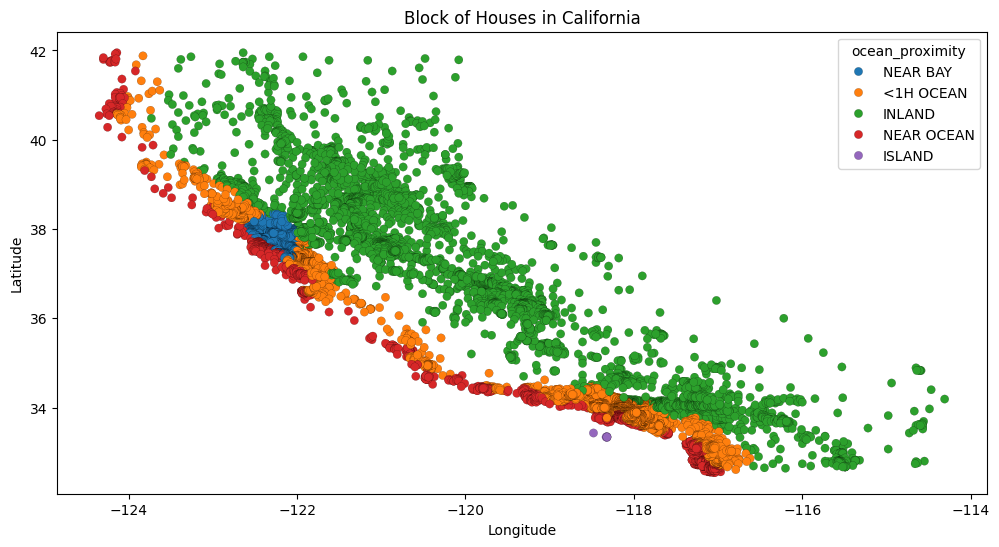

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity', edgecolor='black', linewidth=0.1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Block of Houses in California')

In [11]:
df_OceanProximityAgg = df.groupby(by='ocean_proximity').agg(
    {'median_income' : 'sum', 'median_house_value' : 'sum'}
    )
df_OceanProximityAgg = df_OceanProximityAgg.sort_values(by='median_house_value', ascending=False)

Text(0.5, 0, 'Ocean Proximity')

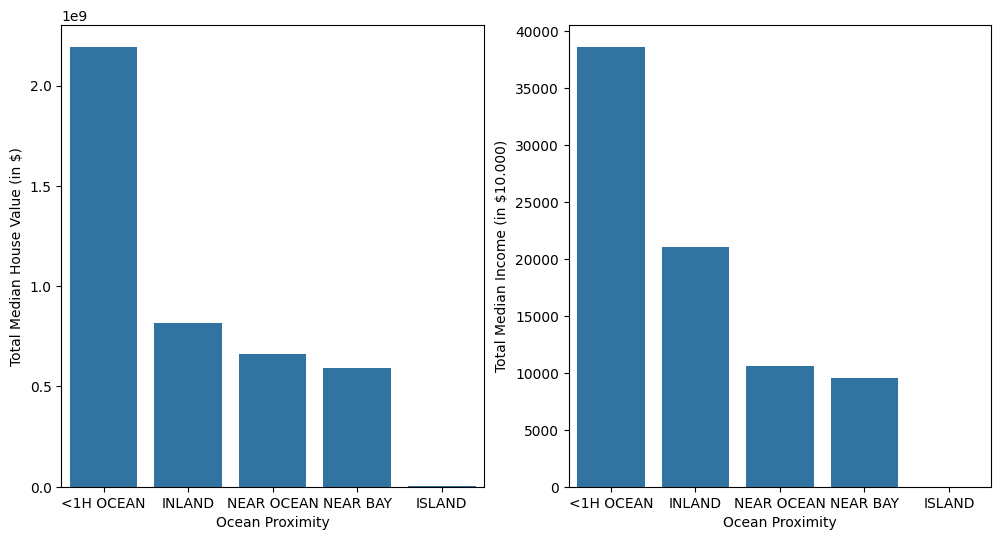

In [12]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2)
sns.barplot(data=df_OceanProximityAgg, x='ocean_proximity', y='median_house_value', ax=ax[0])
ax[0].set_ylabel('Total Median House Value (in $)')
ax[0].set_xlabel('Ocean Proximity')

sns.barplot(data=df_OceanProximityAgg, x='ocean_proximity', y='median_income', ax=ax[1])
ax[1].set_ylabel('Total Median Income (in $10.000)')
ax[1].set_xlabel('Ocean Proximity')

For the ocean_proximity, it must be encoded to numerical data.

In [13]:
mapper = {'<1H OCEAN' : 1, 'INLAND' : 2, 'NEAR OCEAN' : 3, 'NEAR BAY' : 4, 'ISLAND' : 5}

df['ocean_proximity_encoded'] = df['ocean_proximity'].map(mapper)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


<Axes: >

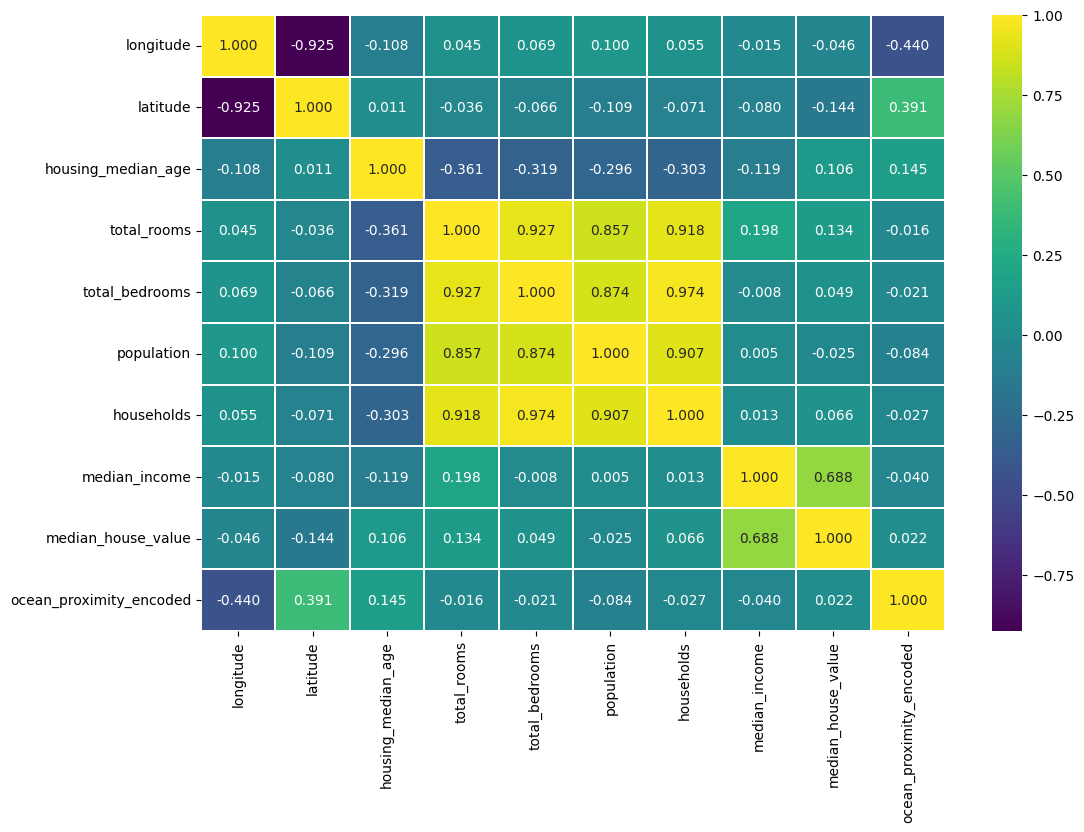

In [14]:
# plotting the pairplot to see the correlation for pair of features

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', linewidths=.2, fmt='.3f', annot=True, ax=ax)

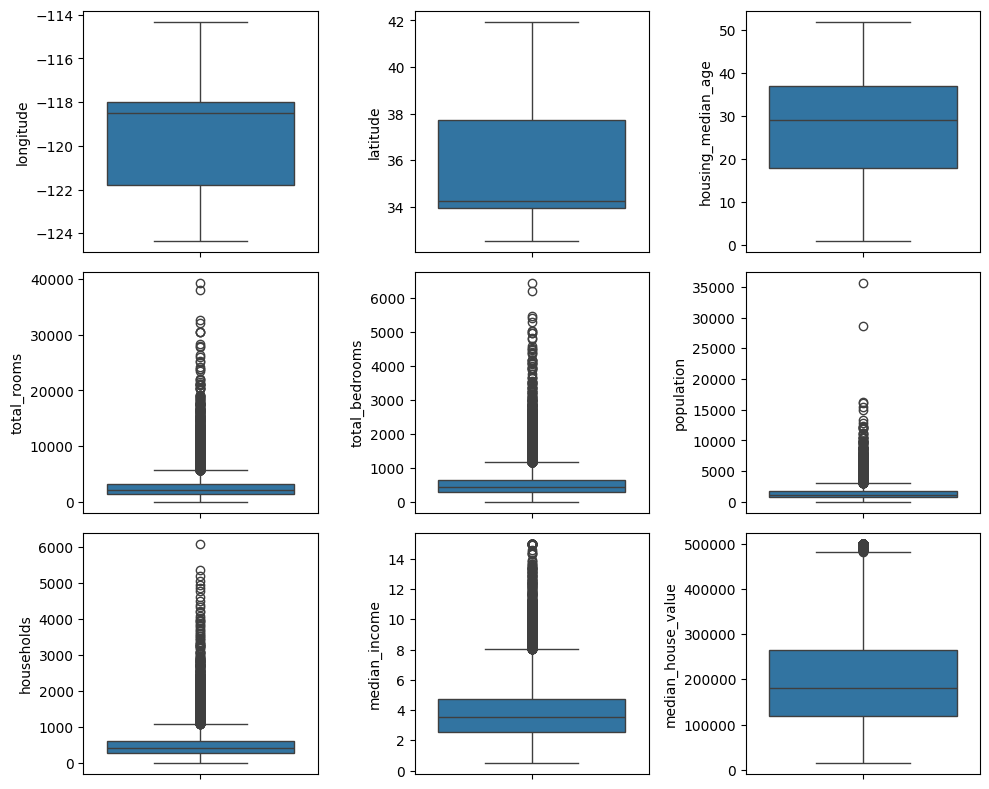

In [15]:
# Checking the outliers for numerical features
df_OnlyFloat = df.select_dtypes('float64')
df_OnlyFloatCols = df_OnlyFloat.columns

fig, ax = plt.subplots(figsize=(10,8), ncols=3, nrows=3)
k = 0
for i in range(3):
  for j in range(3):
    getFeatureCol = df_OnlyFloatCols[k]
    sns.boxplot(df_OnlyFloat[getFeatureCol], ax=ax[i][j])
    plt.tight_layout()
    k += 1


In [16]:
df_clean = df.copy(deep=True)

In [17]:
# Removing outlier using IQR method
features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
n_iteration = 6

for i in range(n_iteration):
  for feature in features:
    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

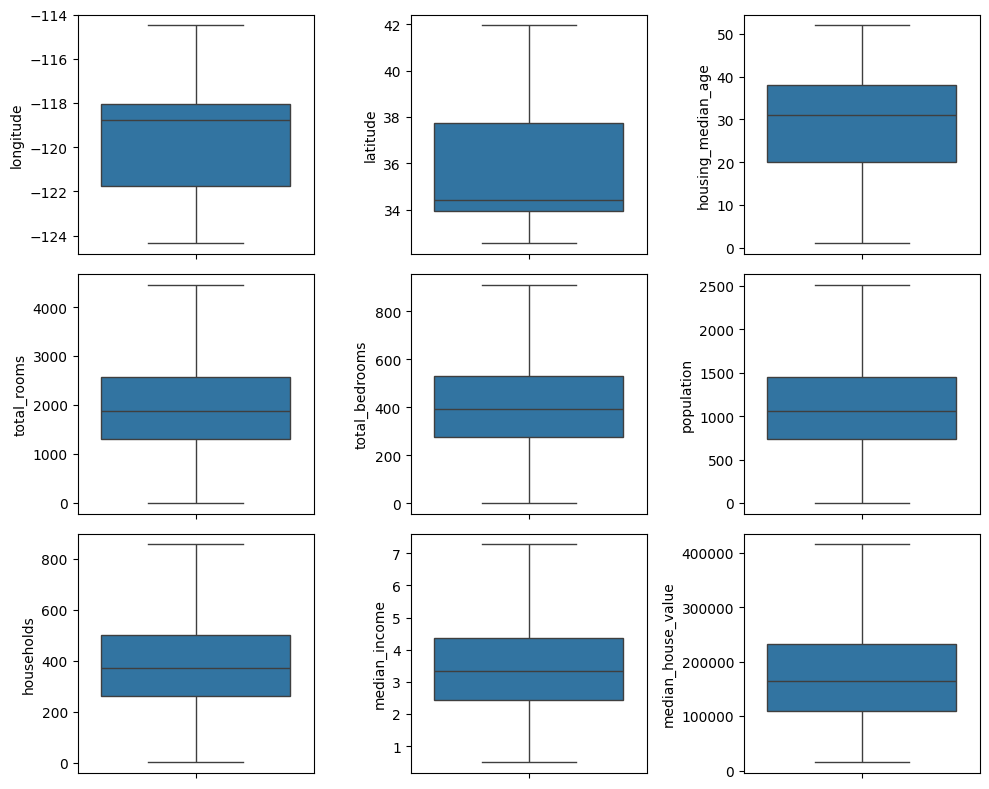

In [19]:
# Checking the outliers for numerical features
df_OnlyFloat = df_clean.select_dtypes('float64')
df_OnlyFloatCols = df_OnlyFloat.columns

fig, ax = plt.subplots(figsize=(10,8), ncols=3, nrows=3)
k = 0
for i in range(3):
  for j in range(3):
    getFeatureCol = df_OnlyFloatCols[k]
    sns.boxplot(df_OnlyFloat[getFeatureCol], ax=ax[i][j])
    plt.tight_layout()
    k += 1


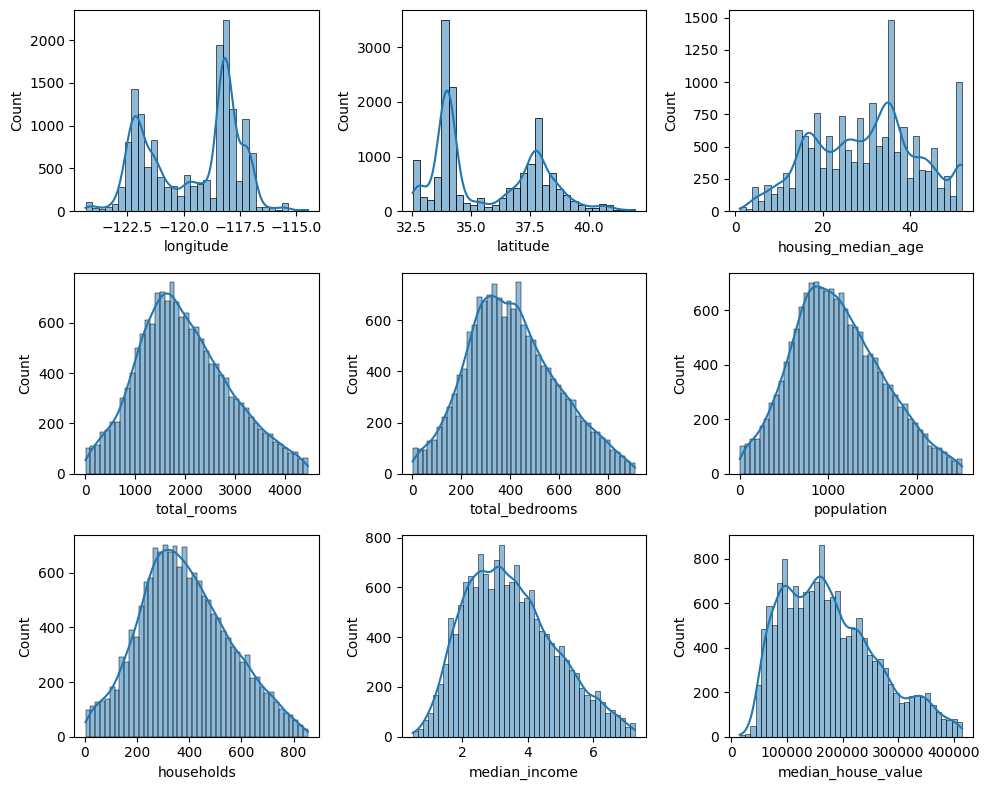

In [20]:
# Checking the outliers for numerical features, except for longitude and latitude
df_OnlyFloat = df_clean.select_dtypes('float64')
df_OnlyFloatCols = df_OnlyFloat.columns

fig, ax = plt.subplots(figsize=(10,8), ncols=3, nrows=3)
k = 0
for i in range(3):
  for j in range(3):
    getFeatureCol = df_OnlyFloatCols[k]
    sns.histplot(df_OnlyFloat[getFeatureCol], kde=True, ax=ax[i][j])
    plt.tight_layout()
    k += 1

Text(0.5, 0, 'Median Income (in $10.000)')

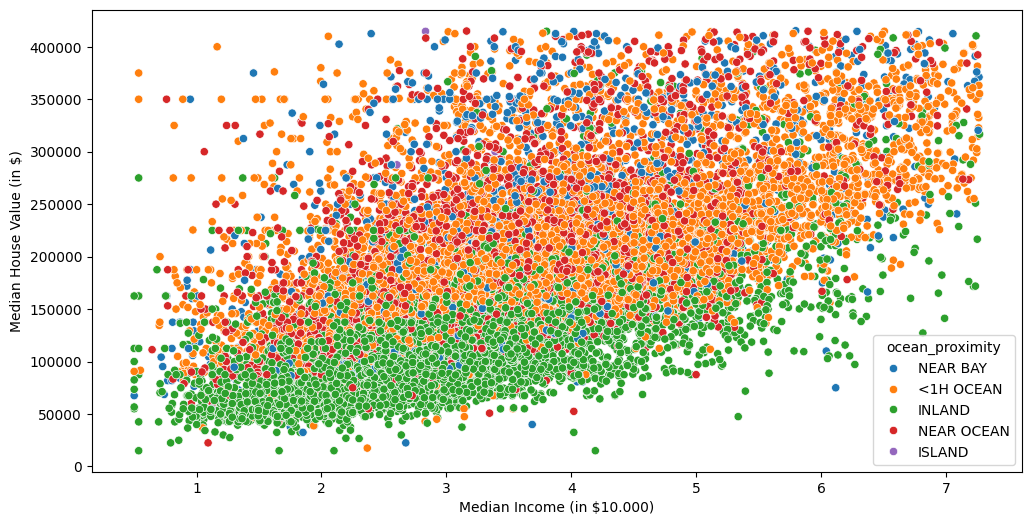

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df_clean, x='median_income', y='median_house_value', hue='ocean_proximity', ax=ax)
ax.set_ylabel('Median House Value (in $)')
ax.set_xlabel('Median Income (in $10.000)')

<Axes: >

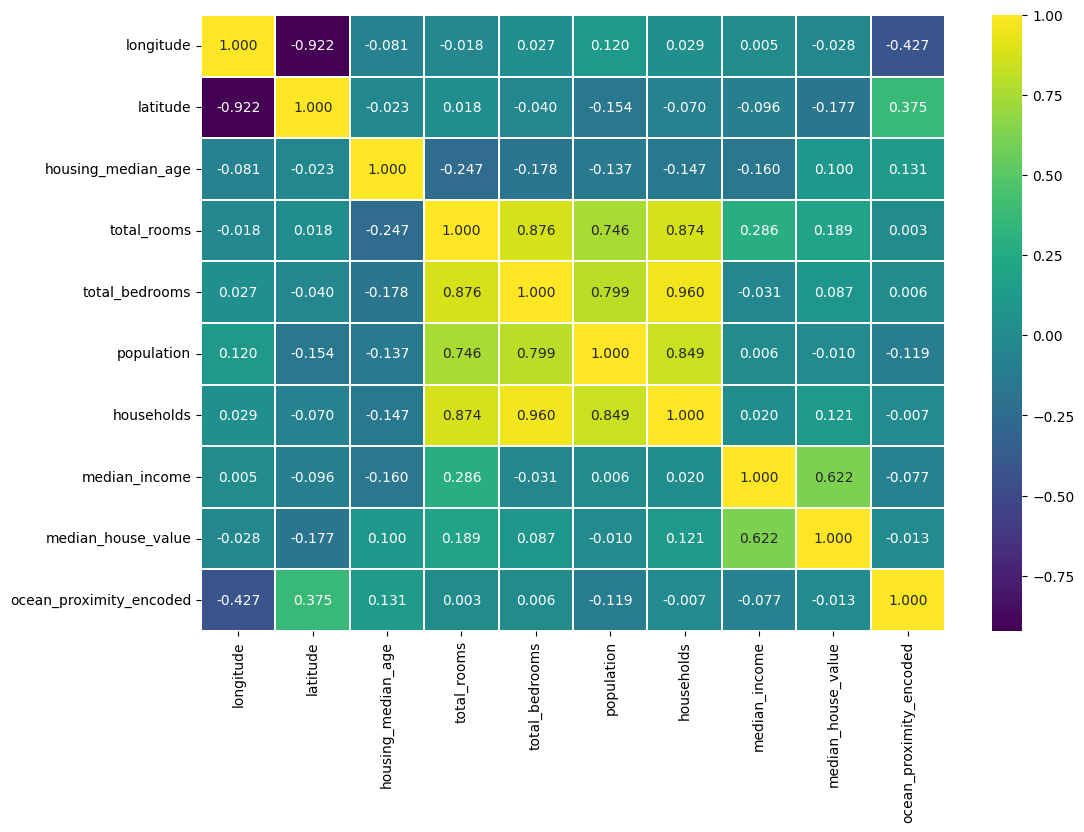

In [22]:
# plotting the pairplot to see the correlation for pair of features

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_clean.corr(numeric_only=True), cmap='viridis', linewidths=.2, fmt='.3f', annot=True, ax=ax)

In [23]:
# The median_income has clear positive correlation with the median house value
# The increasing the median income, the increase the median house value.
# However, the increasing median house value is less significant due to the total
# population, house median age, households, total rooms, and total bedrooms.
# In this case, the median_house_value is the target for creating a linear model
# The rest of features will be as the data

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [24]:
scaler = StandardScaler().set_output(transform="pandas")

In [25]:
y = df_clean['median_house_value']
x = df_clean.drop(['median_house_value', 'ocean_proximity', 'longitude', 'latitude'], axis=1)

# split the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scalling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the dataset using LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)


y_pred = linear_model.predict(x_test_scaled)

# evaluating model
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae_p = mean_absolute_percentage_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE(%): {mae_p:.4f}")

R2: 0.5113
RMSE: 59195.7423
MAE(%): 0.3103
